3.1 VGG16 Model Parameter

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal



In [2]:
model = VGG16()
model.summary()
# retrieve kernel weights from the 1st Convolutional layer
kernels, biases = model.layers[1].get_weights()
# View CNN layer 1 architecture
model.layers[1].get_config()


553467096/553467096 [==============================] - 273s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

อ่านและแสดงภาพหลังปรับโครงสร้างและทำ Preprocess

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(561, 846, 3)
(224, 224, 3)
(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


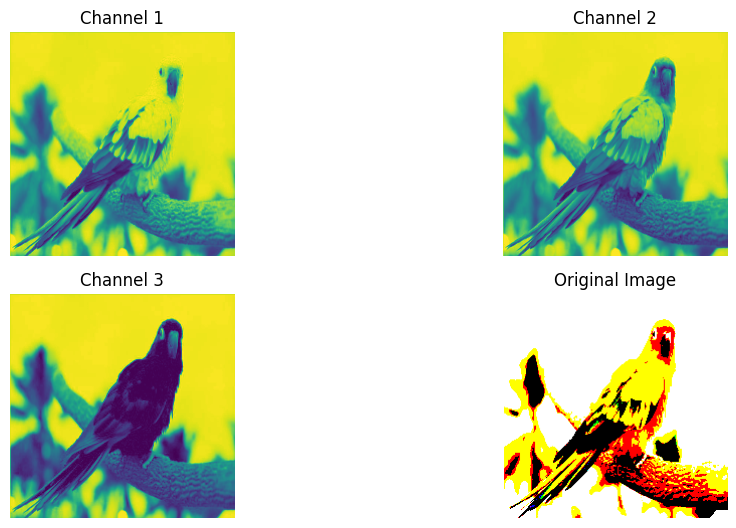

In [42]:
import matplotlib.pyplot as plt

# Load and preprocess the image
img = cv2.imread('images/bird.png')
print(img.shape)
img = cv2.resize(img, (224, 224))
print(img.shape)
img = img_to_array(img)
print(img.shape)
img = expand_dims(img, axis=0)
print(img.shape)
img = preprocess_input(img)
print(img.shape)
# Create a 2x2 subplot grid
plt.figure(figsize=(10, 8))

# Display each channel in a separate subplot
for i in range(3):
    plt.subplot(3, 2, i+1)
    plt.imshow(img[0, :, :, i])  # Display one channel at a time
    plt.title(f'Channel {i+1}')
    plt.axis('off')

# Display the original image in the fourth subplot
plt.subplot(3, 2, 4)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

วิเคราะห์เฉพาะ layer 1 ของ VGG16 

In [37]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# Extract Results from CNN Layer 1 called feature map (shape = (sample = 1, 224, 224, n_filters) )
# CNN Layer 1 -> n_filters = 64
feature_maps = model.predict(img)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 232ms/step


3.2 Image Preparation (from scratch)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

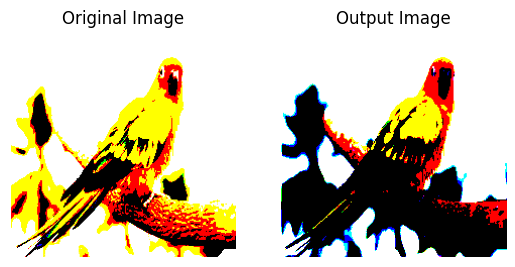

In [57]:
import matplotlib.pyplot as plt

# Load and preprocess the image
img = cv2.imread('images/bird.png')
img = cv2.resize(img, (224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
print(img.shape)
img_mean = [0,0,0]
for i in range(img.shape[1]):
    for j in range(img.shape[2]):
        for k in range(img.shape[3]):
            img_mean[k] += (img[0,i,j,k] / (img.shape[1]*img.shape[2]))
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')
for i in range(img.shape[1]):
    for j in range(img.shape[2]):
        for k in range(img.shape[3]):
            img[0,i,j,k] = round(img[0,i,j,k] - img_mean[k])

imgBGR = img[0]
plt.subplot(1, 2, 2)
plt.imshow(imgBGR)
plt.title('Output Image')
plt.axis('off')       

3.3 2DImage Convolution using filter kernels from VGG16 Layer 1

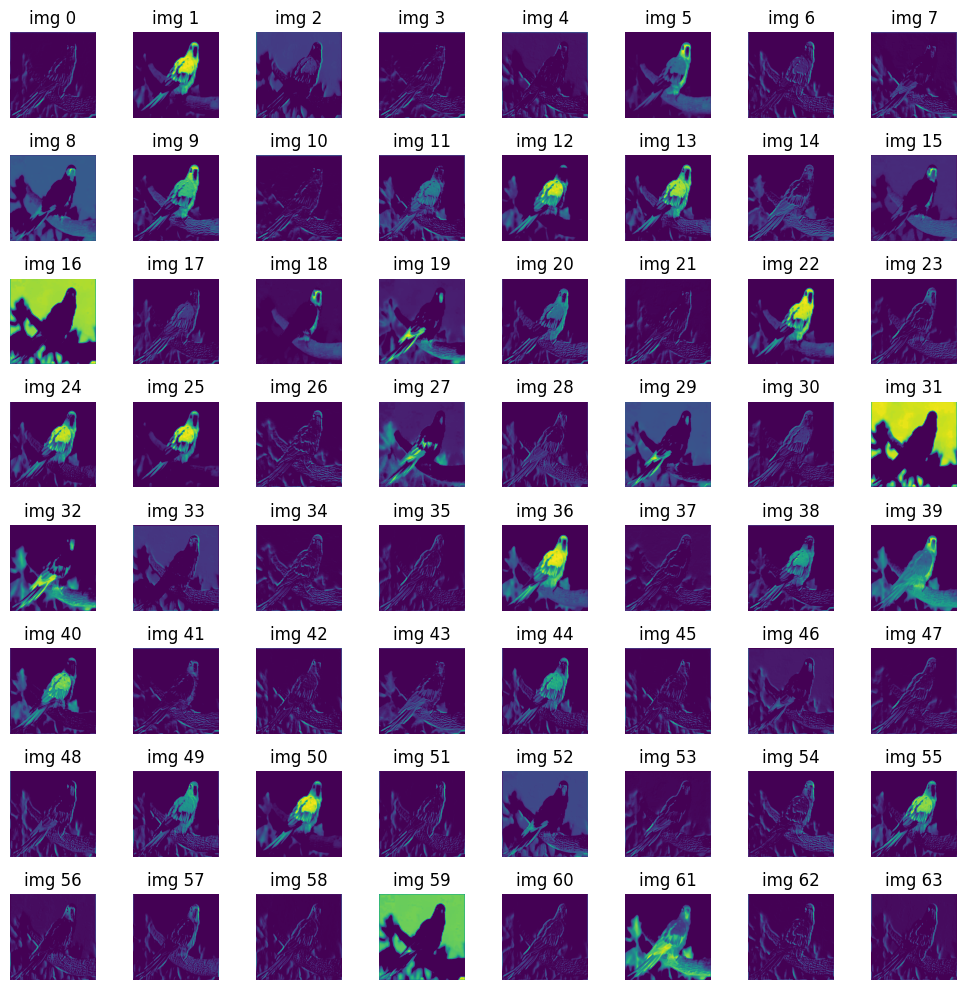

In [65]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

img_result = np.zeros(shape=(224, 224, 3))
image_display = []
for i in range(64):
    for j in range(3):
        img_result[:, :, j] = signal.convolve2d(imgBGR[:, :, j], kernels[:, :, j, i], mode='same', boundary='fill', fillvalue=0)
    convolved_img = img_result[:, :, 0] + img_result[:, :, 1] + img_result[:, :, 2]
    convolved_img = np.maximum(0, convolved_img)
    image_display.append(convolved_img)

plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(image_display[i])
    plt.title(f'img {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
